In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb) <- newnames
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
#Creo una nueva database para pruebas y modificaciones
airbnb_new <- airbnb

In [48]:
#Consulto los códigos postales:
airbnb_new$CodigoPostal

[1] 28004        28004        28004        28004        28015       
    [6] 28004        28004        28004        28015        28004       
   [11] 28004        28004        28013        28005        28013       
   [16] 28013        28013        28012        28013        28013       
   [21] 28013        28005        28013        28012        28012       
   [26] 28013        28014        28013        28012        28005       
   [31] 28005        28005        28005        28012        28005       
   [36] 28005        28045        28005        28005        28005       
   [41] 28005        28005        28013        28013        28013       
   [46] 28013        28013        28012        28013        28012       
   [51] 28013        28013        28013        28012        28013       
   [56] 28013        28012        27013                     28045       
   [61] 28045        28045        28045        28045        28045       
   [66] 28045        28045        28045        28045        28045       
   [71] 28045        28012        28045        28045        28045       
   [76] 28045        28012        28012        28012        28012       
   [81] 28005        28012                     28005        28012       
   [86] 28012        28012        28012        28012        28005       
   [91] 28012        28005        28005        28012        28005       
   [96] 28012        28012        28005        28005        28005       
  [101] 28012        28012        28005        28012        28014       
  [106] 28014        28014        28014        28012        28014       
  [111] 28014        28014        28012        28014        28014       
  [116] 28014        28014        28014        28012        28012       
  [121] 28014        28012        28012        28005        28012       
  [126] 28012        28012        28012        28012        28005       
  [131] 28005                     28012                     28012       
  [136] 28012        28012        28005        28012        28012       
  [141] 28014        28014        28045        28045        28045       
  [146] 28045        28007        28007        28007        28007       
  [151] 28007        28007        28028        28009        28009       
  [156] 28009        28009        28014        28014        28007       
  [161] 28005        28013        28005        28005        28013       
  [166] 28013        28013        28005        28013        28013       
  [171] 28005        28005        28005        28013        28013       
  [176] 28013        28005        28013        28005        28013       
  [181] 28013        28005        28013        28005        28013       
  [186] 28013        28005        28005        28013        28013       
  [191] 28005        28013        28005        28013        28005       
  [196] 28013        28005        28005        28005        28005       
  [201] 28005        28013        28005        28005        28005       
  [206] 28013        28013        28012        28005        28012       
  [211] 28005        28012        28005        28012        28012       
  [216] 28005        28012        28005        28012        28012       
  [221] 28012        28012        28012        28012        28012       
  [226] 28012        28012        28013        28013        28014       
  [231] 28012        28012        28012        28005        28005       
  [236] 28005        28012        28012        28005        28012       
  [241] 28012        28012        28012        28012        28012       
  [246] 28012        28014        28014        28014        28014       
  [251] 28012        28014        28014        28014        28014       
  [256] 28004        28004        28004        28004        28004       
  [261] 28004        28004        28004        28004        28004       
  [266] 28001        28001        28006        28001        28001       
  [271] 28001        28001        28001        28001        28

In [7]:
#Limpio los Códigos postales

airbnb_new[which(airbnb_new$CodigoPostal== ""),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal== "-"),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == "28"),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == "28002\n28002"),"CodigoPostal"] <- "28002"
airbnb_new[which(airbnb_new$CodigoPostal == "2804"),"CodigoPostal"] <- "28004"
airbnb_new[which(airbnb_new$CodigoPostal == "2805"),"CodigoPostal"] <- "28005"
airbnb_new[which(airbnb_new$CodigoPostal == "2815"),"CodigoPostal"] <- "28015"
airbnb_new[which(airbnb_new$CodigoPostal == "28051\n28051"),"CodigoPostal"] <- "28051"
airbnb_new[which(airbnb_new$CodigoPostal == "280013"),"CodigoPostal"] <- "28013"
airbnb_new[which(airbnb_new$CodigoPostal == "Madrid 28004"),"CodigoPostal"] <- "28004"
airbnb_new[which(airbnb_new$CodigoPostal=="20013"),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal=="20126"),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal=="25008"),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal=="27004"),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal=="27013"),"CodigoPostal"] <- NA
airbnb_new[which(airbnb_new$CodigoPostal=="2015"), "CodigoPostal"] <- NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [8]:
# Limpio de Levels los Códigos Postales eliminados
airbnb_new <- droplevels(airbnb_new)
#Muestro todos los Códigos Postales que hay en airbnb_new
airbnb_new$CodigoPostal

[1] 28004 28004 28004 28004 28015 28004 28004 28004 28015 28004 28004 28004
   [13] 28013 28005 28013 28013 28013 28012 28013 28013 28013 28005 28013 28012
   [25] 28012 28013 28014 28013 28012 28005 28005 28005 28005 28012 28005 28005
   [37] 28045 28005 28005 28005 28005 28005 28013 28013 28013 28013 28013 28012
   [49] 28013 28012 28013 28013 28013 28012 28013 28013 28012 <NA>  <NA>  28045
   [61] 28045 28045 28045 28045 28045 28045 28045 28045 28045 28045 28045 28012
   [73] 28045 28045 28045 28045 28012 28012 28012 28012 28005 28012 <NA>  28005
   [85] 28012 28012 28012 28012 28012 28005 28012 28005 28005 28012 28005 28012
   [97] 28012 28005 28005 28005 28012 28012 28005 28012 28014 28014 28014 28014
  [109] 28012 28014 28014 28014 28012 28014 28014 28014 28014 28014 28012 28012
  [121] 28014 28012 28012 28005 28012 28012 28012 28012 28012 28005 28005 <NA> 
  [133] 28012 <NA>  28012 28012 28012 28005 28012 28012 28014 28014 28045 28045
  [145] 28045 28045 28007 28007 28007 28007 28007 28007 28028 28009 28009 28009
  [157] 28009 28014 28014 28007 28005 28013 28005 28005 28013 28013 28013 28005
  [169] 28013 28013 28005 28005 28005 28013 28013 28013 28005 28013 28005 28013
  [181] 28013 28005 28013 28005 28013 28013 28005 28005 28013 28013 28005 28013
  [193] 28005 28013 28005 28013 28005 28005 28005 28005 28005 28013 28005 28005
  [205] 28005 28013 28013 28012 28005 28012 28005 28012 28005 28012 28012 28005
  [217] 28012 28005 28012 28012 28012 28012 28012 28012 28012 28012 28012 28013
  [229] 28013 28014 28012 28012 28012 28005 28005 28005 28012 28012 28005 28012
  [241] 28012 28012 28012 28012 28012 28012 28014 28014 28014 28014 28012 28014
  [253] 28014 28014 28014 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [265] 28004 28001 28001 28006 28001 28001 28001 28001 28001 28001 28001 28006
  [277] 28009 <NA>  28009 28009 28009 28006 28009 28006 28006 <NA>  28028 <NA> 
  [289] 28028 28028 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [301] 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [313] 28015 28004 28004 28004 28015 28004 28004 28015 28004 28004 28004 28004
  [325] 28004 28013 28015 28004 28015 28004 28004 28004 28015 28004 28004 28004
  [337] 28015 28015 28015 28015 28015 28015 28015 28010 28015 28010 28010 28010
  [349] 28010 28010 28010 28010 28004 28010 28010 28010 28028 28028 28028 28028
  [361] 28006 28006 28006 28006 28002 28002 28006 28002 28002 28034 28050 28008
  [373] 28011 28011 28049 28038 28053 28038 28047 28011 28011 28011 28011 28011
  [385] 28011 28011 28047 28011 28011 28011 28011 <NA>  28025 28019 28019 28024
  [397] 28019 28019 28019 28019 28019 <NA>  28025 28019 28002 28002 28002 28016
  [409] 28016 28036 28016 28016 28016 28036 28016 28046 28039 28039 28020 28020
  [421] 28020 28020 28020 28020 28003 28029 28029 28029 28020 28015 28015 28015
  [433] 28015 28015 28015 28015 28015 28015 28015 28010 28003 28003 28003 28003
  [445] 28003 28003 28029 28008 28008 28008 28008 28008 28015 28008 28008 28008
  [457] 28008 28008 28008 28008 28008 28025 28025 28025 28054 28025 28041 28041
  [469] 28026 28026 28026 28038 28053 28058 28053 28053 28018 28018 28018 28053
  [481] 28053 28030 28030 28030 28017 28017 28027 28027 28027 28027 28027 28027
  [493] 28027 28027 28027 28043 28033 28043 28043 28033 28033 28033 28033 28033
  [505] 28033 28041 28050 28055 28021 28041 28032 28032 28032 28032 28037 28037
  [517] 28022 28027 28042 28004 28004 28004 28004 28004 28004 28004 28015 28004
  [529] 28004 <NA>  28004 28004 28004 28094 28013 28013 28005 28005 28005 28013
  [541] 28005 28005 28013 28005 28005 28005 28005 28005 28013 28013 28005 28013
  [553] 28009 28001 28001 28009 28001 28001 28001 28001 28001 28028 28001 28006
  [565] 28028 28028 28028 28028 28012 28012 28012 28012 28013 28014 28012 28012
  [577] 28013 28005 28013 28013 28013 28012 28013 28013 28045 28045 28045 28045
  [589] 28045 28045 28045 28045 28045 28045 28012 <NA>  28045 28012 28045 28003
  [6

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [9]:
#Ordenados de forma decreciente
print("5 Códigos Postales con más entradas:")
head(sort(table(airbnb_new$CodigoPostal), decreasing = TRUE),n=5)

#Ordenados de forma creciente
print("5 Códigos Postales con menos entradas:")
head(sort(table(airbnb_new$CodigoPostal)),n=5)

#Tabla de todos los códigos postales y sus entradas
print("Todos los Códigos Postales y sus entradas:")
table(airbnb_new$CodigoPostal)


[1] "5 Códigos Postales con más entradas:"



28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 

[1] "5 Códigos Postales con menos entradas:"



28048 28052 28056 28058 28060 
    1     1     1     1     1 

[1] "Todos los Códigos Postales y sus entradas:"



28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1796  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [10]:
#Creo esta variable para conocer los barrios del Código Postal 28012
b_cp28012 <- airbnb_new$Barrio[airbnb_new$CodigoPostal=="28012"]
b_cp280122 <- na.omit(b_cp28012)
# Borro los levels que no se usan
b_cp28012 <- droplevels(b_cp28012)
# Muestro los barrios del Código Postal 28012
levels(b_cp28012)

[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [11]:
table(b_cp28012)

b_cp28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [12]:
paste("En total hay", length(unique(airbnb_new$Barrio)), "barrios en el dataset de airbnb_new")

print("Estos son los nombres de los Barrios del Dataset:")
levels(airbnb_new$Barrio)

[1] "En total hay 125 barrios en el dataset de airbnb_new"

[1] "Estos son los nombres de los Barrios del Dataset:"


[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [13]:
print("5 Barrios con mayor número de entradas:")
head(sort(table(airbnb_new$Barrio), decreasing = TRUE),n=5)

[1] "5 Barrios con mayor número de entradas:"



Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [14]:
print("¿Cuántos tipos de alquileres hay?")
length(levels(airbnb_new$TipoAlquiler))

print("Tipos de alquileres que hay:")
levels(airbnb_new$TipoAlquiler)

print("Entradas por tipos de alquileres que hay")
table(airbnb_new$TipoAlquiler)

[1] "¿Cuántos tipos de alquileres hay?"


[1] 3

[1] "Tipos de alquileres que hay:"


[1] "Entire home/apt" "Private room"    "Shared room"

[1] "Entradas por tipos de alquileres que hay"



Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


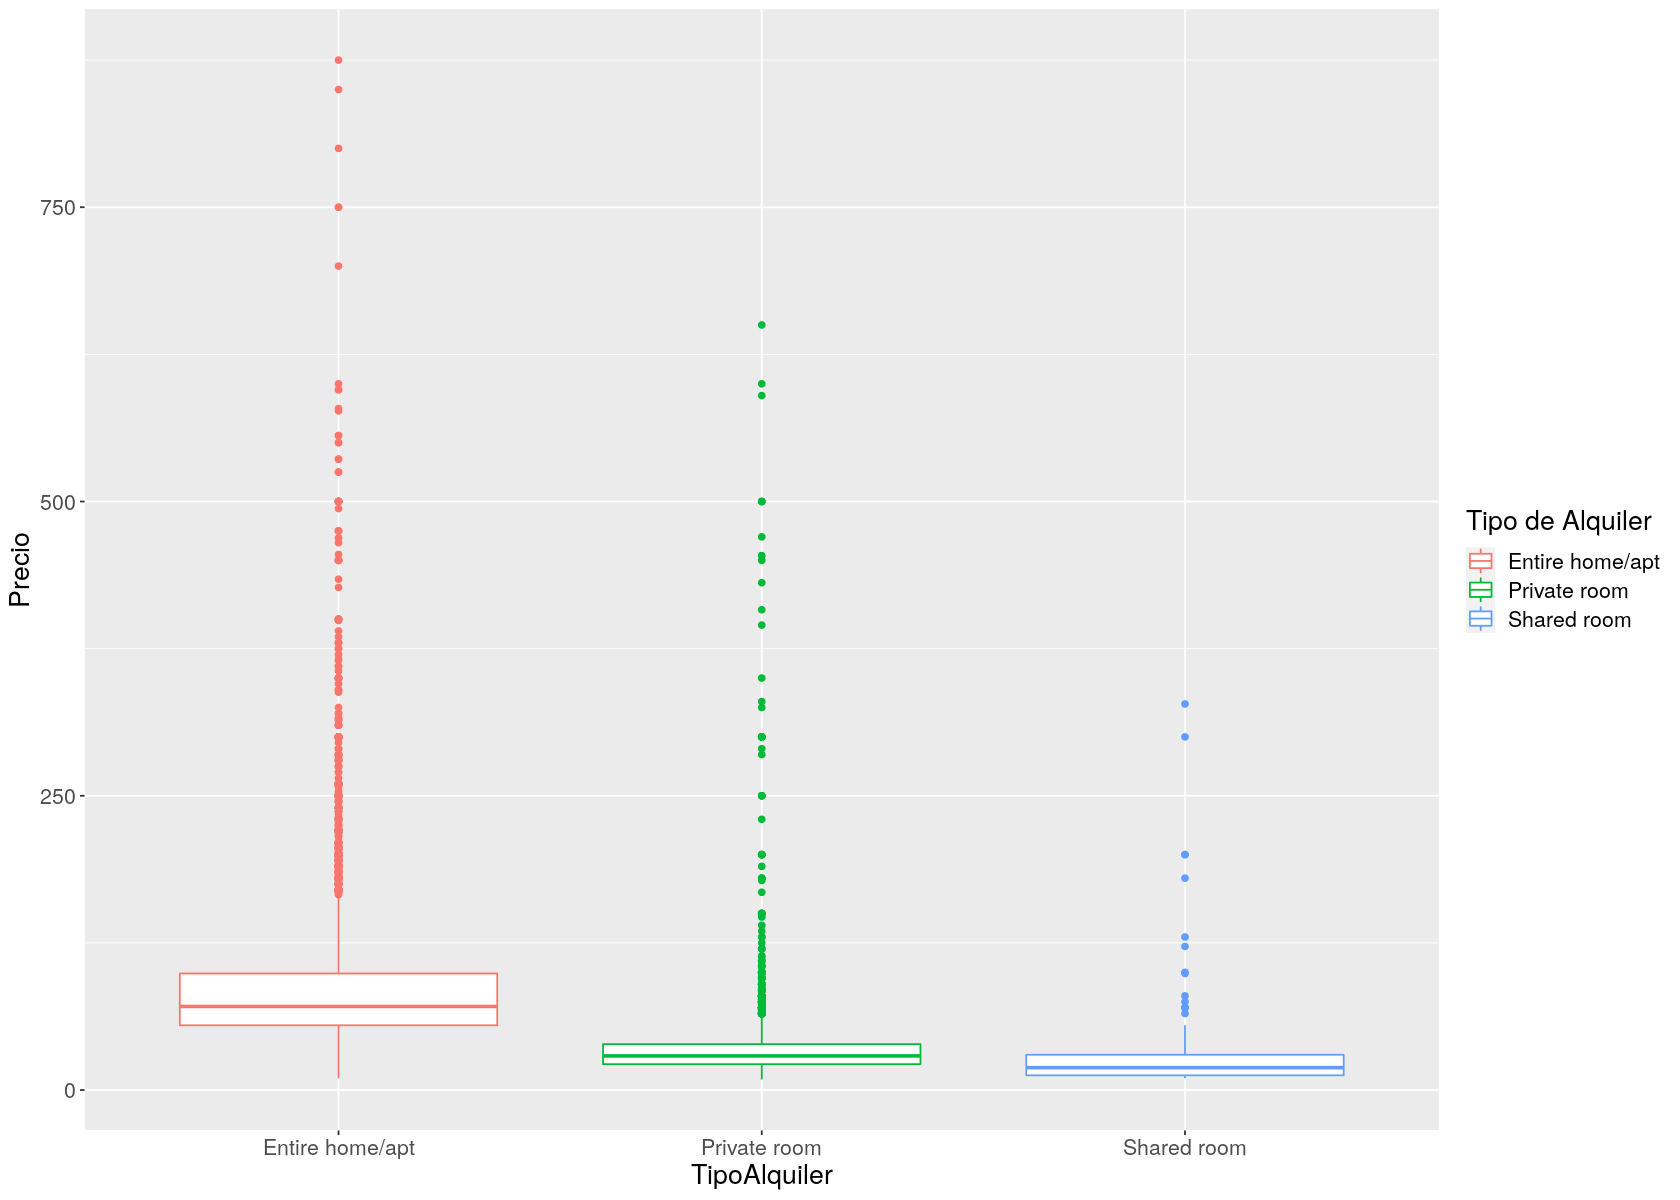

In [15]:
# Instalando librería("ggplot2")
library("ggplot2")
options(repr.plot.height=10,repr.plot.width=14)

ggplot(data=airbnb_new,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
scale_color_discrete(name="Tipo de Alquiler") +
theme(tex=element_text(size=16))

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [16]:
#Precio medio de Alquiler de cada tipo de Alquiler
aEntire <- round(mean(airbnb[airbnb$TipoAlquiler=="Entire home/apt", "Precio"], na.rm = TRUE),2)
print(paste("El precio medio de un Alquiler Completo es:", aEntire, "€"))

aPrivate <- round(mean(airbnb[airbnb$TipoAlquiler=="Private room", "Precio"], na.rm = TRUE),2)
print(paste("El precio medio de un Alquiler Privado es:", aPrivate, "€"))

aShare <- round(mean(airbnb[airbnb$TipoAlquiler=="Shared room", "Precio"], na.rm = TRUE),2)
print(paste("El precio medio de Alquiler de una Habitación compartida es:", aShare, "€"))


[1] "El precio medio de un Alquiler Completo es: 87.3 €"
[1] "El precio medio de un Alquiler Privado es: 34.26 €"
[1] "El precio medio de Alquiler de una Habitación compartida es: 29.85 €"


In [60]:
#*La media nos permite saber que el precio de alquiler es proporcional al tamaño del espacio a alquilar.

# Realizamos el Tests para saber si la diferencia es estadísticamente significativa. 

# Test shapiro
EntireHome=airbnb[airbnb$TipoAlquiler=="Entire home/apt", "Precio"]
shapiro.test(EntireHome[1:5000])

PrivateRoom=airbnb[airbnb$TipoAlquiler=="Private room", "Precio"]
shapiro.test(PrivateRoom[1:5000])

SharedRoom=airbnb[airbnb$TipoAlquiler=="Shared room", "Precio"]
shapiro.test(SharedRoom[1:5000])


	Shapiro-Wilk normality test

data:  EntireHome[1:5000]
W = 0.64959, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  PrivateRoom[1:5000]
W = 0.38267, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  SharedRoom[1:5000]
W = 0.4436, p-value < 2.2e-16


In [17]:
#El p-valor es bajo lo que quiere decir que la distribución no es gaussiana. Probamos con el Test de Kruskal
kruskal.test(Precio ~ TipoAlquiler, data=airbnb_new)



	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


In [62]:
# Si mi test de kruskal me está dando un p valor de < 2.2e-16 indicaría un resultado significativo.
# lo que significa que el valor de p real es incluso menor que 2,2e-16 
# por tanto la diferencia entre las medias son estadísticamente significativas. 

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
airbnb_entire <- airbnb_new[airbnb_new$TipoAlquiler=="Entire home/apt",]
print("Entradas que tiene un alquiler del piso completo")
nrow(airbnb_entire)
head(airbnb_entire)

[1] "Entradas que tiene un alquiler del piso completo"


[1] 7903

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [19]:
print("5 barrios con mayor número de apartamentos enteror en alquiler")
head(sort(table(airbnb_entire$Barrio), decreasing = TRUE),n=5)

[1] "5 barrios con mayor número de apartamentos enteror en alquiler"



Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
df <- aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)
df <- df[with(df, order(-df$Precio)), ]
print("Barrios con mayor precio medio de alquiler para aptos enteros")
head(df, n=5)


[1] "Barrios con mayor precio medio de alquiler para aptos enteros"


,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
# Creamos un dataframe con las frecuencias de los barrios:
barrioFreq <- data.frame(table(airbnb_entire$Barrio))

# Cambiamos los nombres de las columnas:
names(barrioFreq) <- c("Barrio", "Freq")
barrioFreqP <- merge(df, barrioFreq)

#Mostramos el precio por cada barrio
barrioFreqP <- barrioFreqP[with(barrioFreqP, order(-barrioFreqP$Precio)), ]
head(barrioFreqP, n=5)

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El Plantío,150.0000,1
30,Castellana,141.3889,73


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
top5 <- head(barrioFreqP[barrioFreqP$Freq>100,], n=5)
top5 

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


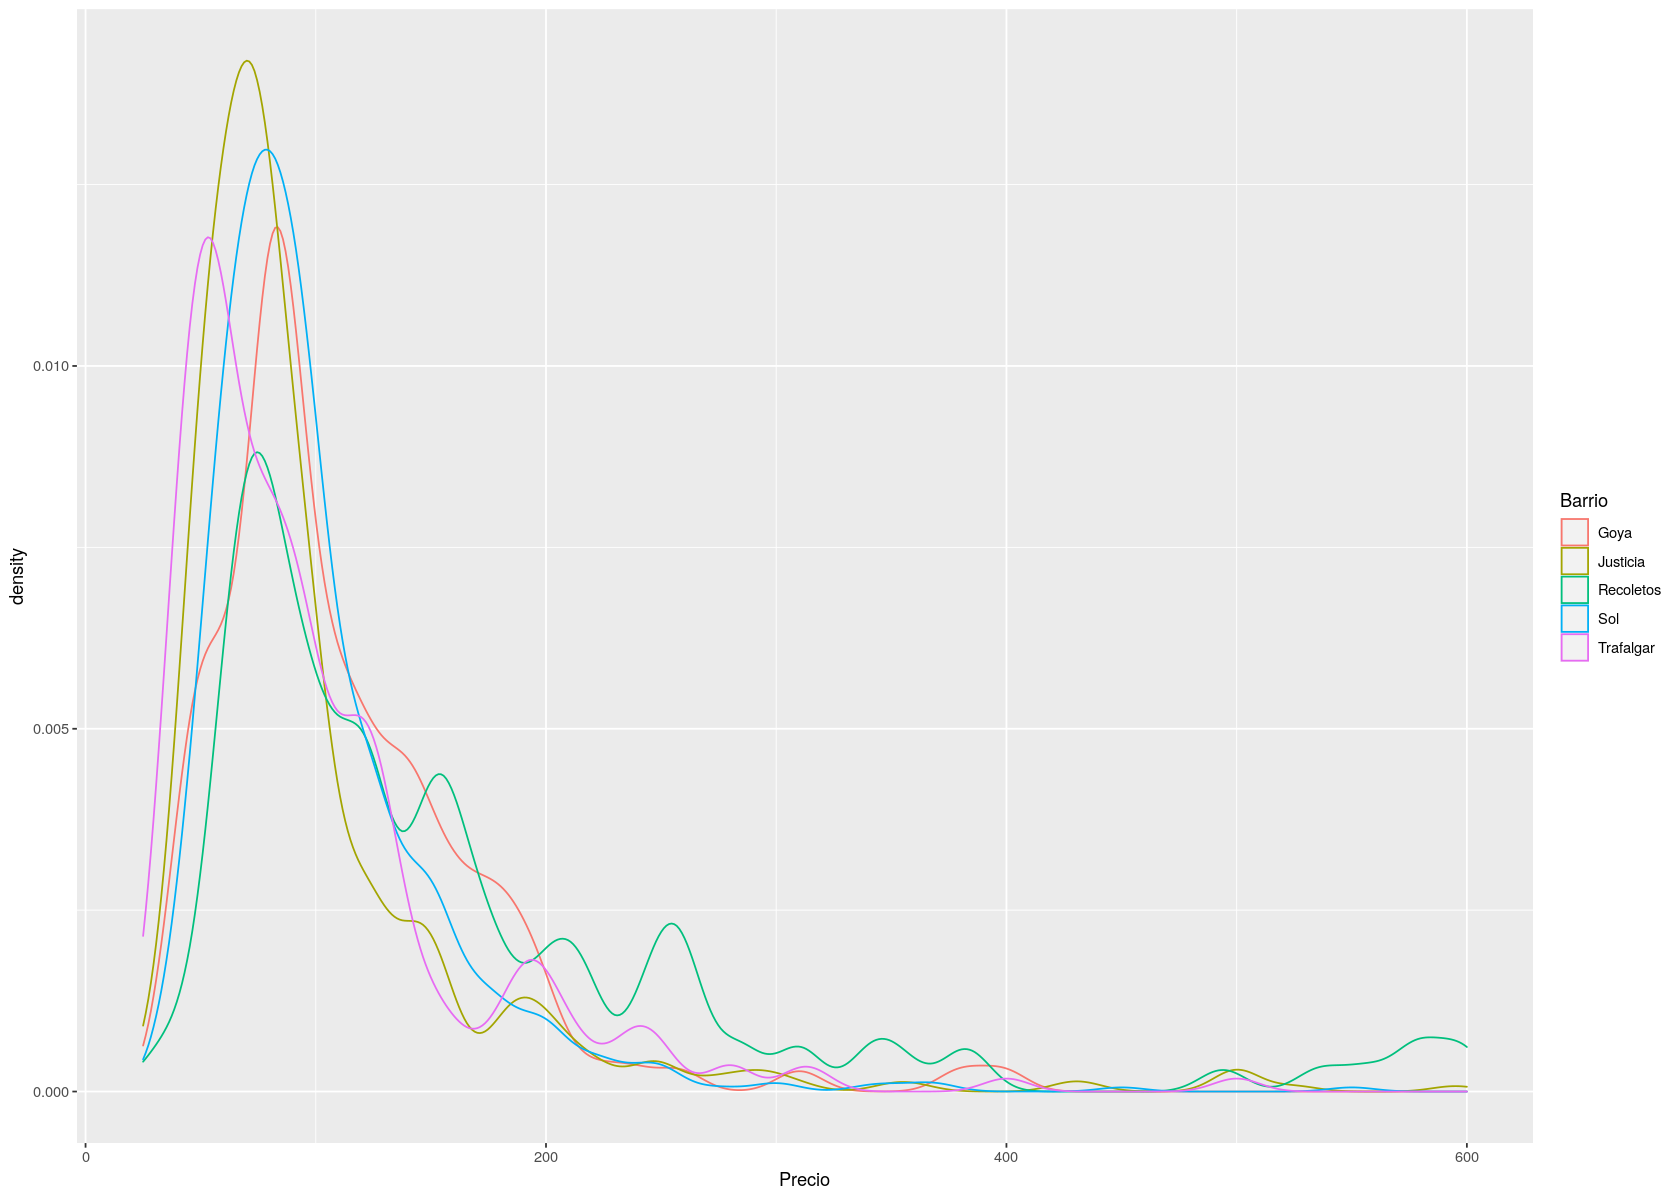

In [23]:
topPrecio_barrios<-head(top5,5)$Barrio
top_barrios<-subset(airbnb_entire,Barrio %in% topPrecio_barrios)
ggplot(top_barrios,aes(x=Precio,color=Barrio))+geom_density(bw=10)


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [25]:
metros_cuadrados = c()
for(barrio in top5$Barrio){
    metros_barrio <- mean(airbnb_entire[airbnb_entire$Barrio==barrio,"MetrosCuadrados"],na.rm = TRUE)
    metros_cuadrados <- c(metros_cuadrados, metros_barrio)}
top5$MetrosCuadrados <- metros_cuadrados
top5

,Barrio,Precio,Freq,MetrosCuadrados
,<fct>,<dbl>,<int>,<dbl>
93,Recoletos,161.92537,135,26.66316
52,Goya,111.33803,142,51.68504
106,Sol,100.75036,701,45.61692
108,Trafalgar,98.57848,223,29.30426
59,Justicia,98.25468,534,28.52669


In [27]:
mediaT <- aggregate(. ~ Barrio, airbnb_entire[c("Barrio", "MetrosCuadrados")], mean, na.rm = TRUE)
mediPrecio <- merge(top5, mediaT, by="Barrio")

mediPrecio <- mediPrecio[order(mediPrecio $Precio, decreasing = TRUE),]
head(mediPrecio, 5)

#Se me creó otra columna porque ejecuté dos veces 

,Barrio,Precio,Freq,MetrosCuadrados.x,MetrosCuadrados.y
,<fct>,<dbl>,<int>,<dbl>,<dbl>
3,Recoletos,161.92537,135,26.66316,26.66316
1,Goya,111.33803,142,51.68504,51.68504
4,Sol,100.75036,701,45.61692,45.61692
5,Trafalgar,98.57848,223,29.30426,29.30426
2,Justicia,98.25468,534,28.52669,28.52669


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


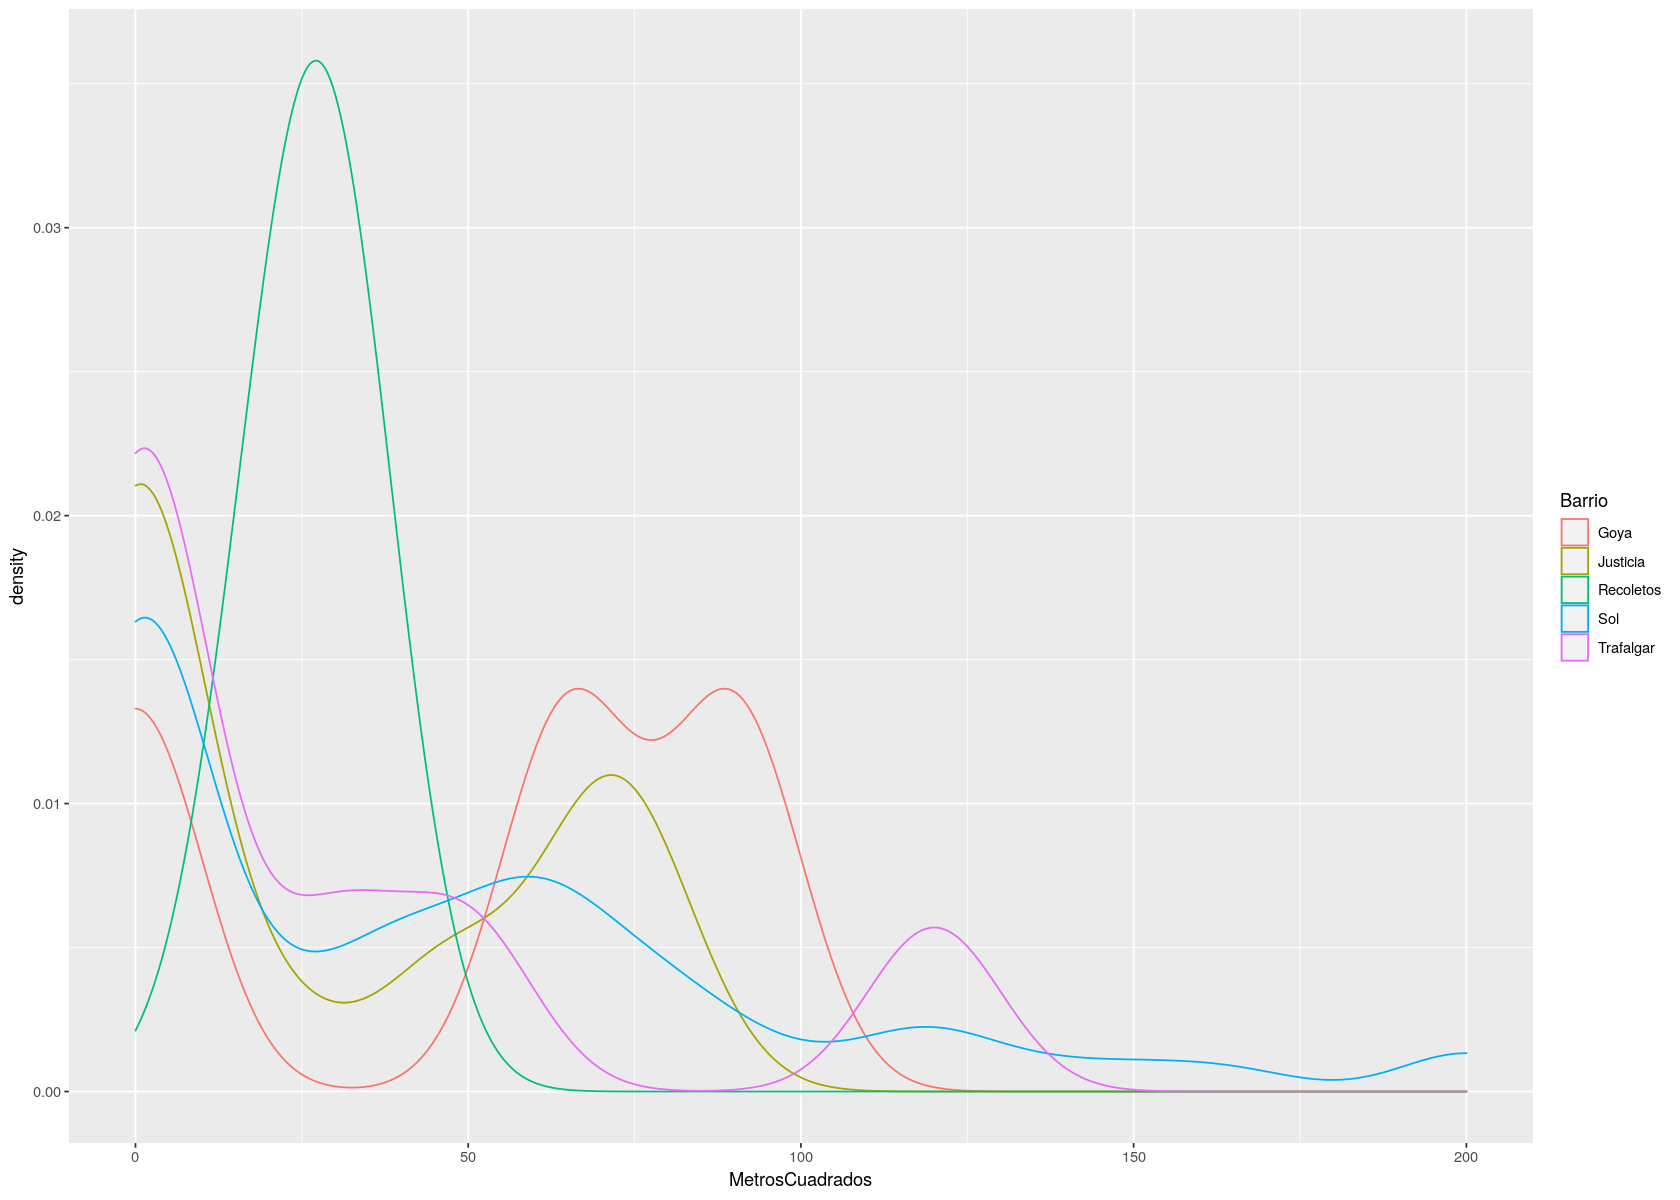

In [28]:
top5_Tamanyo <- head(mediPrecio, 5) $Barrio
top_barrios <- subset(airbnb_entire, Barrio %in% topPrecio_barrios)
ggplot(top_barrios, aes(x=MetrosCuadrados, color=Barrio))+geom_density(bw=10)

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [29]:
# Debido a las direfencias que podemos observar en el gráfico anterior realizaremos el test de Shapiro 
# Para saber si estamos o no ante una distribución gaussiana
Barrio_Goya=airbnb_entire[airbnb_entire$Barrio=="Goya", "MetrosCuadrados"]
shapiro.test(Barrio_Goya)

Barrio_Justicia=airbnb_entire[airbnb_entire$Barrio=="Justicia", "MetrosCuadrados"]
shapiro.test(Barrio_Justicia)

Barrio_Sol=airbnb_entire[airbnb_entire$Barrio=="Sol", "MetrosCuadrados"]
shapiro.test(Barrio_Sol)

Barrio_Recoletos=airbnb_entire[airbnb_entire$Barrio=="Recoletos", "MetrosCuadrados"]
shapiro.test(Barrio_Recoletos)

Barrio_Trafalgar=airbnb_entire[airbnb_entire$Barrio=="Trafalgar", "MetrosCuadrados"]
shapiro.test(Barrio_Trafalgar)


	Shapiro-Wilk normality test

data:  Barrio_Goya
W = 0.93813, p-value = 0.5199



	Shapiro-Wilk normality test

data:  Barrio_Justicia
W = 0.76212, p-value = 0.0006419



	Shapiro-Wilk normality test

data:  Barrio_Sol
W = 0.83089, p-value = 8.691e-07



	Shapiro-Wilk normality test

data:  Barrio_Recoletos
W = 0.75, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Barrio_Trafalgar
W = 0.75023, p-value = 0.01276


In [37]:
# El p-value es muy bajo en la mayoría de los barrios lo que quiere decir que no sigue una distribución gaussiana. 
# EL barrio de Goya tiene un p-value alto en comparación al resto pero no podemos decir que tiene una 
# distribución normal, procedemos a realizar otro test.

In [39]:
#Al no seguir una distribución gaussiana optamos por el test de kruskal.

kruskal.test( MetrosCuadrados ~ Barrio, data=top_barrios)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


In [ ]:
# Tenemos un p valor alto de 0.7574 sin embargo esto no nos da sufientes evidencias de que el tamaño de los aptos
# En los barrios sea diferentes como para que exista una diferencia estadística considerable. 

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [40]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [41]:
print("La correlación es:")
cor(barrio_sol[,c("NumBanyos", 
                  "NumDormitorios", 
                  "MaxOcupantes", 
                  "MetrosCuadrados")], use="pairwise.complete.obs")

[1] "La correlación es:"


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


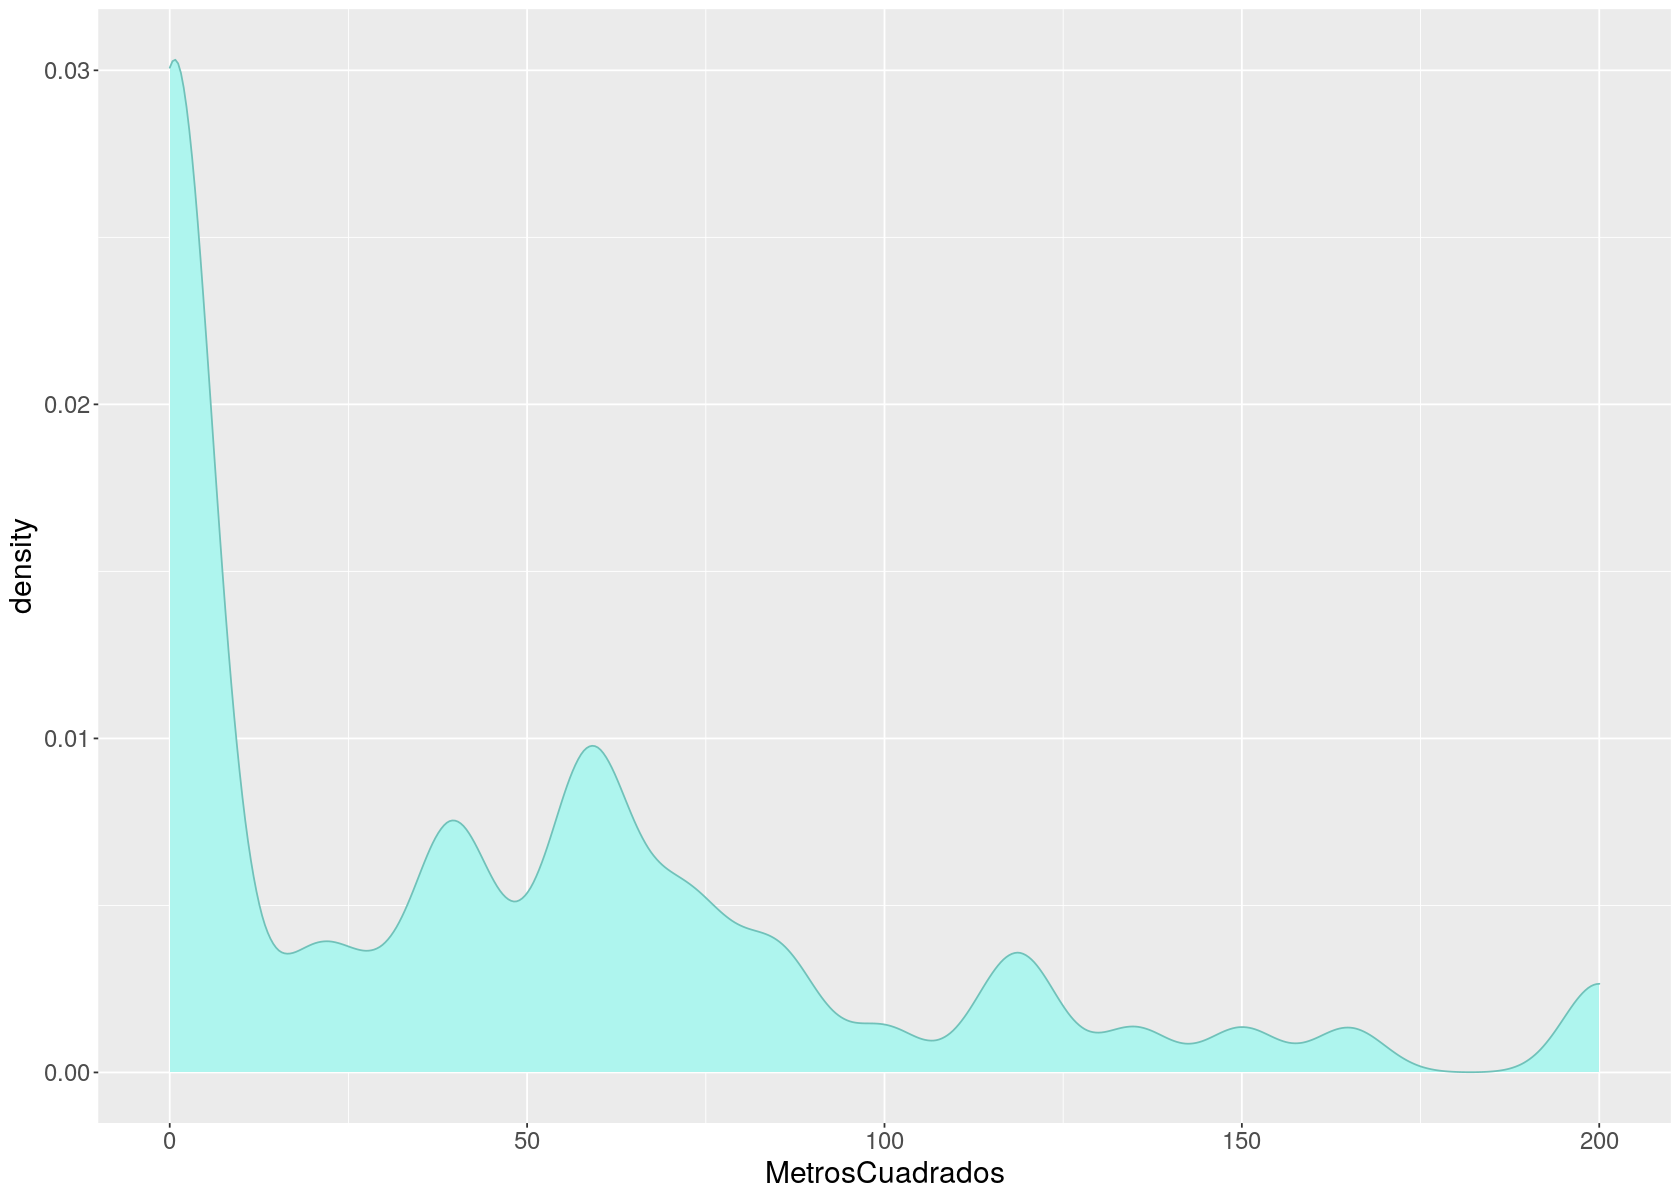

In [42]:
ggplot(data=barrio_sol, aes(MetrosCuadrados))+
geom_density(fill="#AEF5EE",color="#70C1B9", bw=5)+
theme(tex=element_text(size=18))

In [43]:
barrio_sol <- subset(barrio_sol, MetrosCuadrados > 10)
barrio_sol <- subset(barrio_sol, NumDormitorios > 0)

In [44]:
barrio_sol <- subset(airbnb_entire, Barrio == "Sol" & MetrosCuadrados > 10)
print("La correlación es:")
cor(barrio_sol[,c("NumBanyos", 
                  "NumDormitorios", 
                  "MaxOcupantes", 
                  "MetrosCuadrados")], use="pairwise.complete.obs")

[1] "La correlación es:"


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7292599,0.8589205,0.6113095
NumDormitorios,0.7292599,1.0000000,0.7855310,0.8215065
MaxOcupantes,0.8589205,0.7855310,1.0000000,0.7121088
MetrosCuadrados,0.6113095,0.8215065,0.7121088,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [45]:
model_Comb <- lm(barrio_sol, formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + MaxOcupantes)
summary(model_Comb)



Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


In [47]:
model <- lm(barrio_sol, formula = Precio ~ MetrosCuadrados)
summary(model_Comb)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


In [48]:
model_Comb <- lm(barrio_sol, formula = Precio ~ NumDormitorios)
summary(model_Comb)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


In [ ]:
#Hay una mejor correlación entre el precio y el número de dormitorios

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [49]:
#La variable que mejor correlación tiene con el precio es la del número de habitaciones:
model_Comb <- lm(barrio_sol, formula = Precio ~ NumDormitorios + MetrosCuadrados)
summary(model_Comb)




Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.701 -15.056  -4.442  17.341  68.125 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.0916    10.0930   3.378  0.00193 ** 
NumDormitorios   31.8817     7.0761   4.506 8.31e-05 ***
MetrosCuadrados   0.2558     0.1956   1.308  0.20025    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.7 on 32 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7374 
F-statistic: 48.74 on 2 and 32 DF,  p-value: 1.938e-10


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [53]:
model_Comb <-lm(data=barrio_sol,formula=Precio~MetrosCuadrados)
print(paste("El precio sube",round(model_Comb$coefficients[2],2), "€, por cada metro cuadrado"))
print(paste("El margen de confianza del 95% es: [",confint(model_Comb)[2],",",confint(model_Comb)[4], "]"))

[1] "El precio sube 0.98 €, por cada metro cuadrado"
[1] "El margen de confianza del 95% es: [ 0.694020052426474 , 1.26525006235795 ]"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [54]:
model_Comb<-lm(data=barrio_sol,formula=Precio~NumDormitorios)
print(paste("El precio se incrementa",round(model_Comb$coefficients[2],2), "€, por cada habitación"))
print(paste("El margen de confianza del 95% es: [",confint(model_Comb)[2],",",confint(model_Comb)[4], "]"))

[1] "El precio se incrementa 39.48 €, por cada habitación"
[1] "El margen de confianza del 95% es: [ 31.1874637434115 , 47.7809469179902 ]"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [55]:
tresDormitorios <- sum(barrio_sol $NumDormitorios == 3)
numTotal <- nrow(barrio_sol)

print(paste("La probabilidad de encontrar un apartamento en alquiler con 3 dormitorios es:"
            ,round(tresDormitorios/numTotal*100,2),"%")) 

paste("El margen de confianza es: [",binom.test(tresDormitorios, numTotal) $conf[1],
      ",", binom.test(tresDormitorios, numTotal) $conf[2],"]")

[1] "La probabilidad de encontrar un apartamento en alquiler con 3 dormitorios es: 8.57 %"


[1] "El margen de confianza es: [ 0.0180376398142175 , 0.230575018658877 ]"